# EDA

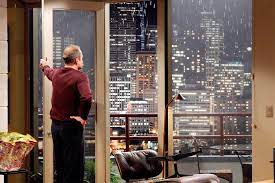

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

I first want to take a quick look into the data. I joined both tables that are available.

In [3]:
# Importing the csv data
df_original = pd.read_csv('data/eda.csv')

In [4]:
# Now I check the high level data
df_original.head(10)

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000
5,2014-05-12,1230000.000,7237550310,6,7237550310,4.000,4.500,5420.000,101930.000,1.000,...,11,3890.000,1530.000,2001,0.000,98053,47.656,-122.005,4760.000,101930.000
6,2014-06-27,257500.000,1321400060,7,1321400060,3.000,2.250,1715.000,6819.000,2.000,...,7,1715.000,NaN,1995,0.000,98003,47.310,-122.327,2238.000,6819.000
7,2015-01-15,291850.000,2008000270,8,2008000270,3.000,1.500,1060.000,9711.000,1.000,...,7,1060.000,0.000,1963,0.000,98198,47.410,-122.315,1650.000,9711.000
8,2015-04-15,229500.000,2414600126,9,2414600126,3.000,1.000,1780.000,7470.000,1.000,...,7,1050.000,730.000,1960,0.000,98146,47.512,-122.337,1780.000,8113.000
9,2015-03-12,323000.000,3793500160,10,3793500160,3.000,2.500,1890.000,6560.000,2.000,...,7,1890.000,0.000,2003,0.000,98038,47.368,-122.031,2390.000,7570.000


In [5]:
df_original.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
#Dropping column id1 which is the column the csv was joined on, and which is duplicate of house_id
df_work = df_original.drop(columns=["id.1"], inplace = True)

In [76]:
df_work = df_original
df_work['date'] = pd.to_datetime(df_work['date'])
df_work.sort_values('date')

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_isolated
7316,2014-05-02,435000.000,2202500290,7317,4.000,1.000,1450.000,8800.000,1.000,0.000,...,1450.000,0.000,1954,0.000,98006,47.575,-122.135,1260.000,8942.000,False
20586,2014-05-02,555000.000,7853361370,20587,4.000,2.500,3310.000,6500.000,2.000,0.000,...,3310.000,0.000,2012,0.000,98065,47.515,-121.870,2380.000,5000.000,False
1040,2014-05-02,550000.000,7197300105,1041,4.000,2.500,1940.000,10500.000,1.000,NaN,...,1140.000,800.000,1976,0.000,98052,47.683,-122.114,2200.000,10500.000,False
20543,2014-05-02,295000.000,3438501320,20544,2.000,2.500,1630.000,1368.000,2.000,0.000,...,1280.000,350.000,2009,0.000,98106,47.549,-122.363,1590.000,2306.000,False
9587,2014-05-02,790000.000,472000620,9588,3.000,2.500,2600.000,4750.000,1.000,0.000,...,1700.000,900.000,1951,0.000,98117,47.683,-122.400,2380.000,4750.000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,2015-05-14,725000.000,8149600265,19382,4.000,1.750,1980.000,5850.000,1.000,NaN,...,1380.000,600.000,1960,0.000,98116,47.561,-122.391,1810.000,5850.000,False
12623,2015-05-14,335000.000,4166600610,12624,3.000,2.000,1410.000,44866.000,1.000,0.000,...,1410.000,0.000,1985,0.000,98023,47.327,-122.370,2950.000,29152.000,True
5632,2015-05-15,450000.000,7923600250,5633,5.000,2.000,1870.000,7344.000,1.500,0.000,...,1870.000,0.000,1960,0.000,98007,47.595,-122.144,1870.000,7650.000,False
13040,2015-05-24,445500.000,5101400871,13041,2.000,1.750,1390.000,6670.000,1.000,0.000,...,720.000,670.000,1941,0.000,98115,47.691,-122.308,920.000,6380.000,False


In [8]:
df_work.describe()

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,...,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,2014-10-29 04:20:38.171968512,540296.574,4580474287.771,10799.000,3.373,2.116,2080.322,15099.409,1.494,0.008,...,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
min,2014-05-02 00:00:00,78000.000,1000102.000,1.000,1.000,0.500,370.000,520.000,1.000,0.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2014-07-22 00:00:00,322000.000,2123049175.000,5400.000,3.000,1.750,1430.000,5040.000,1.000,0.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,2014-10-16 00:00:00,450000.000,3904930410.000,10799.000,3.000,2.250,1910.000,7618.000,1.500,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,2015-02-17 00:00:00,645000.000,7308900490.000,16198.000,4.000,2.500,2550.000,10685.000,2.000,0.000,...,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,2015-05-27 00:00:00,7700000.000,9900000190.000,21597.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,...,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000
std,NaN,367368.140,2876735715.748,6234.661,0.926,0.769,918.106,41412.637,0.540,0.087,...,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442


In [9]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   house_id       21597 non-null  int64         
 3   id             21597 non-null  int64         
 4   bedrooms       21597 non-null  float64       
 5   bathrooms      21597 non-null  float64       
 6   sqft_living    21597 non-null  float64       
 7   sqft_lot       21597 non-null  float64       
 8   floors         21597 non-null  float64       
 9   waterfront     19206 non-null  float64       
 10  view           21534 non-null  float64       
 11  condition      21597 non-null  int64         
 12  grade          21597 non-null  int64         
 13  sqft_above     21597 non-null  float64       
 14  sqft_basement  21145 non-null  float64       
 15  yr_built       2159

In [10]:
# Setting a list of the zip codes that are considered as central Seattle
central_zip_codes = ['98101', '98102', '98103', '98104', '98105', '98106', '98107',
                     '98108', '98109', '98112', '98115', '98116', '98117', '98118',
                     '98119', '98121', '98122', '98125', '98126', '98133', '98134',
                     '98136', '98144', '98146', '98148', '98154', '98155', '98158',
                     '98164', '98166', '98168', '98174', '98177', '98178', '98188',
                     '98195', '98198', '98199']

In [11]:
# of houses SOLD per zip code
df_zip_code_group = df_work.groupby('zipcode').count()
df_zip_code_group

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
zipcode,,,,,,,,,,,,,,,,,,,,,
98001,361,361,361,361,361,361,361,361,361,328,...,361,361,361,353,361,284,361,361,361,361
98002,199,199,199,199,199,199,199,199,199,179,...,199,199,199,198,199,164,199,199,199,199
98003,280,280,280,280,280,280,280,280,280,255,...,280,280,280,273,280,240,280,280,280,280
98004,317,317,317,317,317,317,317,317,317,283,...,317,317,317,315,317,263,317,317,317,317
98005,168,168,168,168,168,168,168,168,168,158,...,168,168,168,167,168,138,168,168,168,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,255,255,255,255,255,255,255,255,255,234,...,255,255,255,252,255,204,255,255,255,255
98178,262,262,262,262,262,262,262,262,262,233,...,262,262,262,258,262,210,262,262,262,262
98188,136,136,136,136,136,136,136,136,136,119,...,136,136,136,131,136,111,136,136,136,136


In [13]:
colors = ['red' if str(zip_code) in central_zip_codes else 'blue' for zip_code in df_zip_code_group.index]
#colors

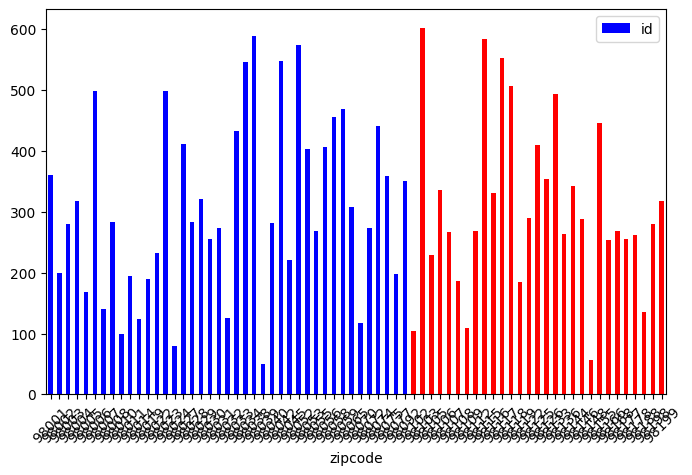

In [14]:
# Plotting the number of houses SOLD per zip code
zip_code_plot = df_zip_code_group.plot(kind = "bar", y = 'id', rot = 45, color = colors)

In [23]:
# Now taking a more precise look into the waterfront houses
# First checking what data we have for waterfronthouses
df_work.groupby('waterfront', dropna = False).count()

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
waterfront,,,,,,,,,,,,,,,,,,,,,
0.000,19060,19060,19060,19060,19060,19060,19060,19060,19060,19004,...,19060,19060,18649,19060,15671,19060,19060,19060,19060,19060
1.000,146,146,146,146,146,146,146,146,146,145,...,146,146,142,146,121,146,146,146,146,146
NaN,2391,2391,2391,2391,2391,2391,2391,2391,2391,2385,...,2391,2391,2354,2391,1957,2391,2391,2391,2391,2391


<Axes: xlabel='zipcode'>

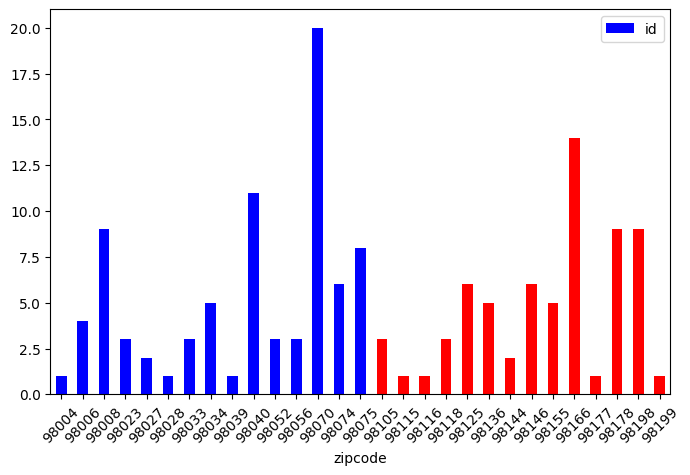

In [24]:
# Now we want to see how they are by zip code
df_waterfront_zipcode = df_work[df_work['waterfront'] == 1].groupby(['zipcode'], dropna = False).count()
colors = ['red' if str(zip_code) in central_zip_codes else 'blue' for zip_code in df_waterfront_zipcode.index]
df_waterfront_zipcode.plot(kind = "bar", y = 'id', rot = 45, color = colors)

In [1]:
# It turns out there are very waterfront house sales. Let's take a more precise look how they are scattered

In [26]:
import folium
import pandas as pd

# Read the CSV file
#data = pd.read_csv('locations.csv')
#df_waterfront = df_work[df_work['waterfront'] == 1]

# Create a map centered around the average latitude and longitude
center_lat = df_work['lat'].mean()
center_lon = df_work['long'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers to the map
for _, row in df_work.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=row['house_id']
    ).add_to(m)

# Save the map to an HTML file
m.save("csv_map_all.html")

# Display the map in a Jupyter notebook (optional)
#m

In [29]:

# Read the CSV file
#data = pd.read_csv('locations.csv')
df_unknown = df_work[df_work['waterfront'].isna()]

# Create a map centered around the average latitude and longitude
center_lat = df_unknown['lat'].mean()
center_lon = df_unknown['long'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers to the map
for _, row in df_unknown.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=row['house_id']
    ).add_to(m)

# Save the map to an HTML file
m.save("csv_map_unknown.html")


In [ ]:
# TBD : what do I do with the information? Do I use a geopandas library or something similar?

In [44]:
# Now checking the average price of waterfront and non waterfront houses

<Axes: >

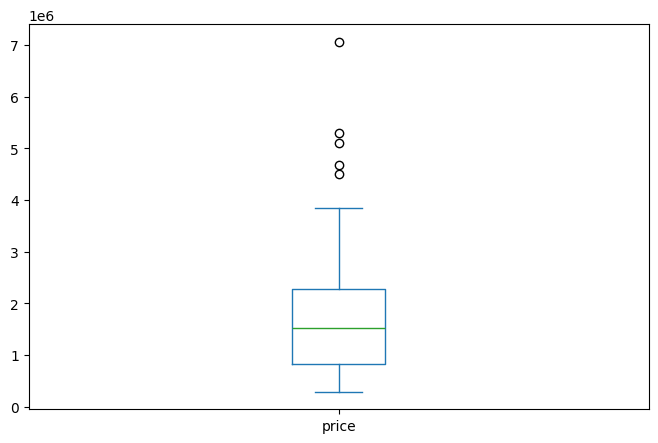

In [34]:
df_waterfront = df_work[df_work['waterfront'] == 1]
df_waterfront['price'].plot(kind = 'box')

<Axes: >

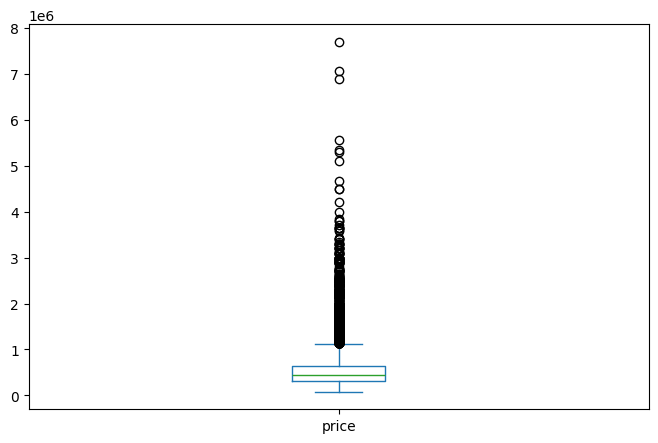

In [31]:
df_work['price'].plot(kind = 'box')

(array([ 3.,  0., 18.,  0., 18.,  0.,  7.,  0.,  2.,  1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

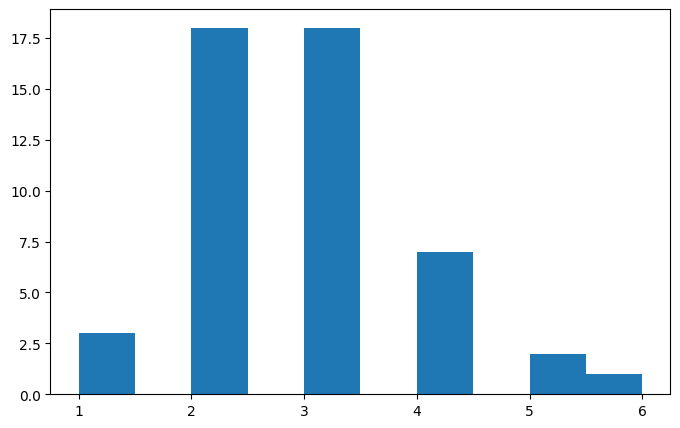

In [35]:
# Waterfront houses are much more expensive than standard houses
# Now let's take a more precise look into all houses that cost 1000000 or less

df_waterfront_cheap = df_waterfront[df_waterfront['price'] < 1000000]
plt.hist(df_waterfront_cheap['bedrooms'], bins = 10)

In [31]:
# so there are a few with 3 or more bedrooms. Let's filter them out and see where they were located

In [ ]:
df_waterfront_cheap_and_big = df_waterfront[df_waterfront['bedrooms'] > 2]
df_waterfront_cheap_and_big.groupby(['zipcode']).count()

In [ ]:
# First hypothesis - 2 graphs. First one shows that the percentage of house sales with waterfront view is very
# small compared to sales without. Second, that the prices are much higher

<Axes: xlabel='zipcode'>

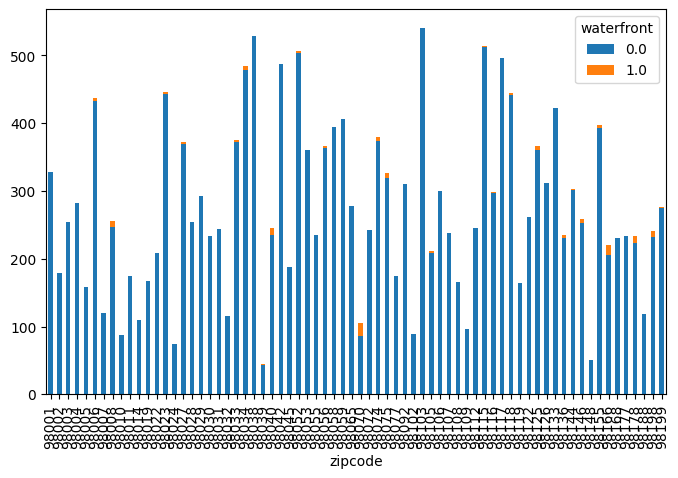

In [36]:
df_work_waterfront_zipcode = df_work.groupby(['zipcode','waterfront'])['id'].count().unstack().fillna(0)
df_work_waterfront_zipcode.plot(kind='bar',stacked = True)

<Axes: xlabel='zipcode'>

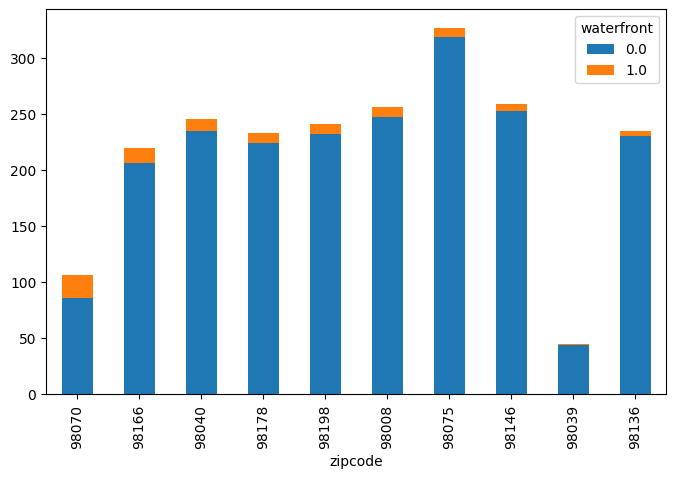

In [37]:
# This was not very convincing. Now only showing those with the highest percentage
df_work_waterfront_zipcode['percent'] = round(df_work_waterfront_zipcode[1.0].div(df_work_waterfront_zipcode.sum(axis=1))*100, 1)
df_work_waterfront_zipcode = df_work_waterfront_zipcode.sort_values('percent', ascending = False)

df_work_waterfront_zipcode[[0.0,1.0]][:10].plot(kind = 'bar', stacked = True) 

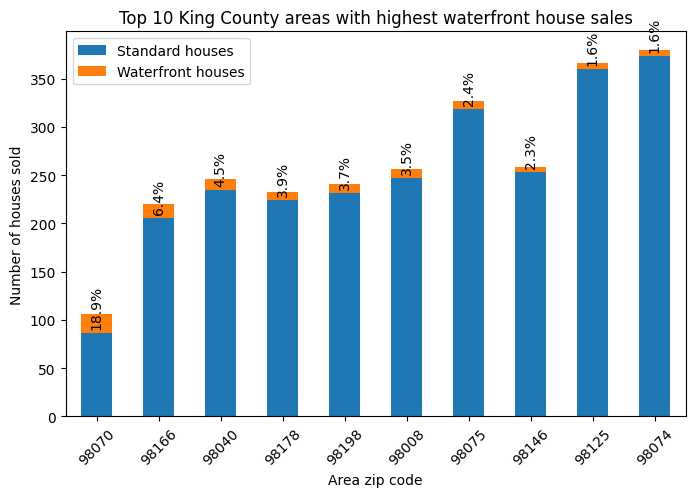

In [38]:
# Now I think we want to have this information order by the number of waterfront houses
df_work_waterfront_zipcode = df_work_waterfront_zipcode.sort_values(1.0, ascending = False)
ax = df_work_waterfront_zipcode[[0.0,1.0]][:10].plot(kind = 'bar', stacked = True, xlabel = 'Area zip code', ylabel = 'Number of houses sold',title = 'Top 10 King County areas with highest waterfront house sales')
for i, value in enumerate(df_work_waterfront_zipcode[0.0][:10]):
    ax.text(i, value + 4, str(df_work_waterfront_zipcode.percent.values[i]) + '%', ha='center', va='bottom', rotation = 90)
ax.legend(['Standard houses','Waterfront houses'])
ax.tick_params(axis='x', labelrotation=45)

In [ ]:
# Now we want to compare the average sales price 

In [25]:
df_work_waterfront_zipcode

waterfront,0.000,1.000,percent
zipcode,,,
98070,86.000,20.000,18.900
98166,206.000,14.000,6.400
98040,235.000,11.000,4.500
98178,224.000,9.000,3.900
98198,232.000,9.000,3.700
...,...,...,...
98133,423.000,0.000,0.000
98148,51.000,0.000,0.000
98122,261.000,0.000,0.000


In [155]:
# Now let's compare the prices in these 10 zip codes

In [26]:
df_work.columns

Index(['date', 'price', 'house_id', 'id', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

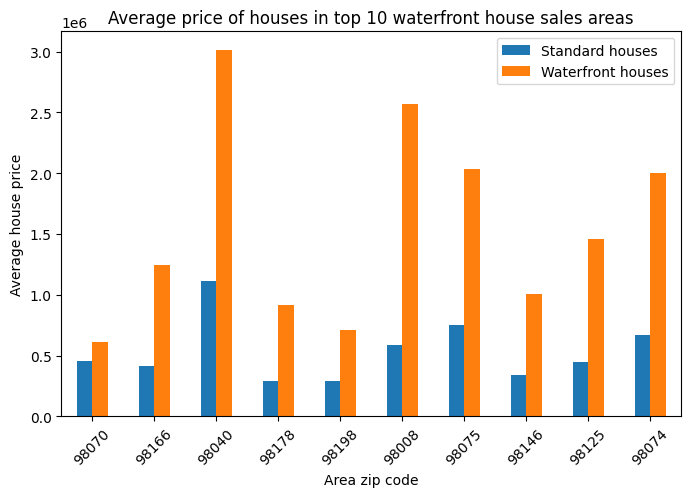

In [39]:
df_work_high_waterfront_sales = df_work[df_work.zipcode.isin(tuple(df_work_waterfront_zipcode[:10].index))]
grouped_df = df_work_high_waterfront_sales.groupby(['zipcode','waterfront']).mean()['price'].unstack().reindex(tuple(df_work_waterfront_zipcode[:10].index))
ax2 = grouped_df.plot(kind='bar', title = 'Average price of houses in top 10 waterfront house sales areas', xlabel = 'Area zip code', ylabel = 'Average house price')
ax2.legend(['Standard houses','Waterfront houses'])
ax2.tick_params(axis='x', labelrotation=45)

In [32]:
df_work

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,3.000,1.000,1180.000,5650.000,1.000,NaN,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,3.000,2.250,2570.000,7242.000,2.000,0.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,2.000,1.000,770.000,10000.000,1.000,0.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,4.000,3.000,1960.000,5000.000,1.000,0.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,3.000,2.000,1680.000,8080.000,1.000,0.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.000,263000018,21593,3.000,2.500,1530.000,1131.000,3.000,0.000,...,8,1530.000,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000
21593,2015-02-23,400000.000,6600060120,21594,4.000,2.500,2310.000,5813.000,2.000,0.000,...,8,2310.000,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000
21594,2014-06-23,402101.000,1523300141,21595,2.000,0.750,1020.000,1350.000,2.000,0.000,...,7,1020.000,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000
21595,2015-01-16,400000.000,291310100,21596,3.000,2.500,1600.000,2388.000,2.000,NaN,...,8,1600.000,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000


## 2nd hypothesis

 Homes for sale in central neighborhoods are less isolated - ie have a smaller lot surface - than in less central neighborhoods

In [ ]:
# Setting a list of the zip codes that are considered as central Seattle

central_zip_codes = ['98101', '98102', '98103', '98104', '98105', '98106', '98107',
                     '98108', '98109', '98112', '98115', '98116', '98117', '98118',
                     '98119', '98121', '98122', '98125', '98126', '98133', '98134',
                     '98136', '98144', '98146', '98148', '98154', '98155', '98158',
                     '98164', '98166', '98168', '98174', '98177', '98178', '98188',
                     '98195', '98198', '98199']

In [54]:
df_work = df_original
df_work['date'] = pd.to_datetime(df_work['date'])
df_work.sort_values('date')
df_work.info()
# Information about the sqft_lot information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   house_id       21597 non-null  int64         
 3   id             21597 non-null  int64         
 4   bedrooms       21597 non-null  float64       
 5   bathrooms      21597 non-null  float64       
 6   sqft_living    21597 non-null  float64       
 7   sqft_lot       21597 non-null  float64       
 8   floors         21597 non-null  float64       
 9   waterfront     19206 non-null  float64       
 10  view           21534 non-null  float64       
 11  condition      21597 non-null  int64         
 12  grade          21597 non-null  int64         
 13  sqft_above     21597 non-null  float64       
 14  sqft_basement  21145 non-null  float64       
 15  yr_built       2159

[Text(0.5, 0, 'Lot surface in square feet\n (excluding values above 100000 square feet)'),
 Text(0, 0.5, 'Number of house sales'),
 Text(0.5, 1.0, 'House sales per lot surface')]

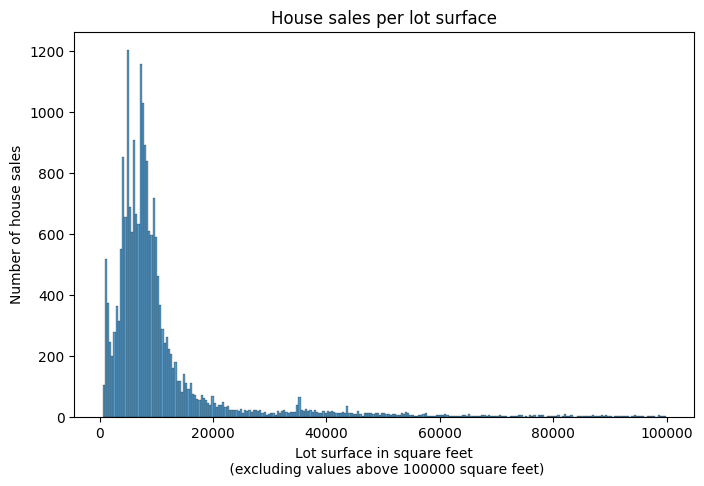

In [55]:
import seaborn as sns

sns.histplot(data = df_work[df_work['sqft_lot'] <= 100000]['sqft_lot'] ).set(xlabel = 'Lot surface in square feet\n (excluding values above 100000 square feet)', ylabel = 'Number of house sales', title='House sales per lot surface')

In [56]:
# it's hard to draw conclusions
df_work['sqft_lot'].describe()

count     21597.000
mean      15099.409
std       41412.637
min         520.000
25%        5040.000
50%        7618.000
75%       10685.000
max     1651359.000
Name: sqft_lot, dtype: float64

[]

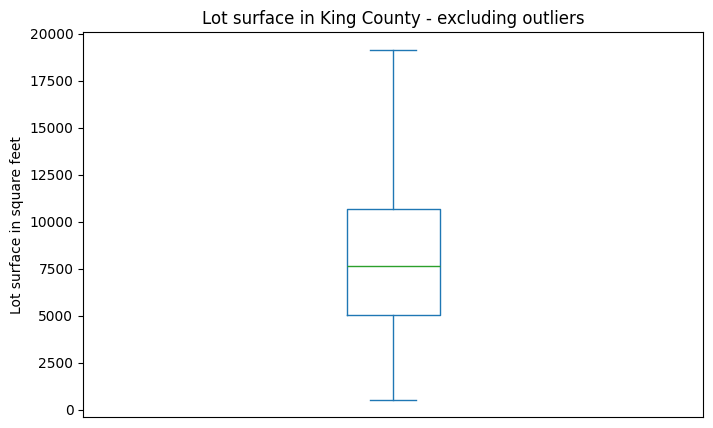

In [49]:
ax7 = df_work['sqft_lot'].plot(kind = 'box',  showfliers=False, xlabel = '', ylabel = 'Lot surface in square feet', title = 'Lot surface in King County - excluding outliers')
ax7.set_xticks([])

In [58]:
# We will consider as isolated all homes that are in the top 25% - ie with sqft higher than 10685 square feet, which is ~1000 square meters (ie 33 x 33 m)
# df_work_isolated = df_work[df_work['sqft_lot'] >= 10685]
df_work_isolated = df_work
df_work_isolated['is_isolated'] = [ True if surface >= 10685 else False for surface in df_work_isolated['sqft_lot']]
df_work_isolated[['sqft_lot','is_isolated']].head(100)

,sqft_lot,is_isolated
0,5650.000,False
1,7242.000,False
2,10000.000,False
3,5000.000,False
4,8080.000,False
...,...,...
95,10250.000,False
96,15681.000,True
97,6400.000,False
98,41800.000,True


<Axes: xlabel='zipcode'>

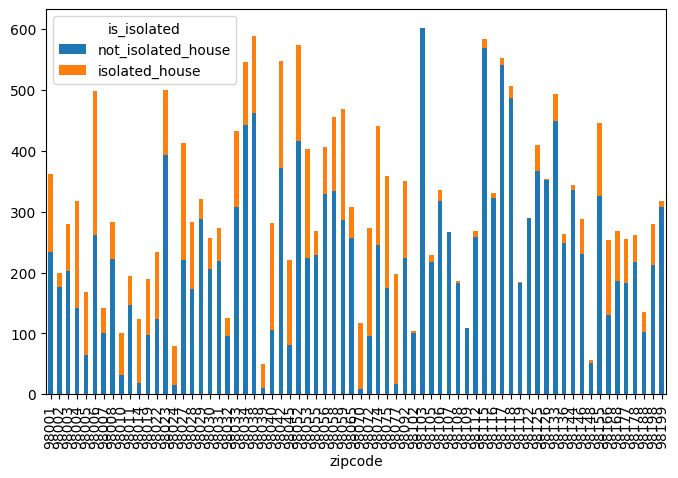

In [59]:
# Now we want to check the zip codes with the highest sales of isolated houses
df_work_isolated_groups = df_work_isolated.groupby(['zipcode','is_isolated'])['id'].count().unstack().fillna(0)
df_work_isolated_groups = df_work_isolated_groups.rename(columns = {True: 'isolated_house', False: 'not_isolated_house'})
df_work_isolated_groups.sort_values('isolated_house', ascending = False)
df_work_isolated_groups.plot(kind='bar',stacked = True)

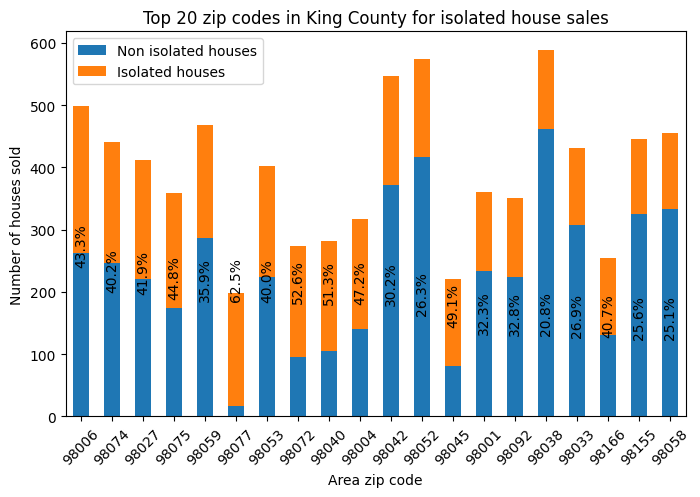

In [62]:
# Now only showing those with the highest percentage
#df_work_isolated_groups['percent'] = round(df_work_isolated_groups[True].div(df_work_isolated_groups.sum(axis=1))*100, 1)
#df_work_isolated_groups = df_work_isolated_groups.sort_values('percent', ascending = False)

#df_work_isolated_groups[[False,True]][:10].plot(kind = 'bar', stacked = True) 

df_work_isolated_groups['percent'] = round(df_work_isolated_groups['isolated_house'].div(df_work_isolated_groups.sum(axis=1))*100, 1)
df_work_isolated_groups = df_work_isolated_groups.sort_values('isolated_house', ascending = False)
ax4 = df_work_isolated_groups[['not_isolated_house','isolated_house']][:20].plot(kind='bar',stacked = True, title = 'Top 20 zip codes in King County for isolated house sales', xlabel = 'Area zip code', ylabel = 'Number of houses sold')
for i, value in enumerate(df_work_isolated_groups['isolated_house'][:20]):
    ax4.text(i, value + 4, str(df_work_isolated_groups.percent.values[i]) + '%', ha='center', va='bottom', rotation = 90)
ax4.legend(['Non isolated houses','Isolated houses'])
ax4.tick_params(axis='x', labelrotation=45)

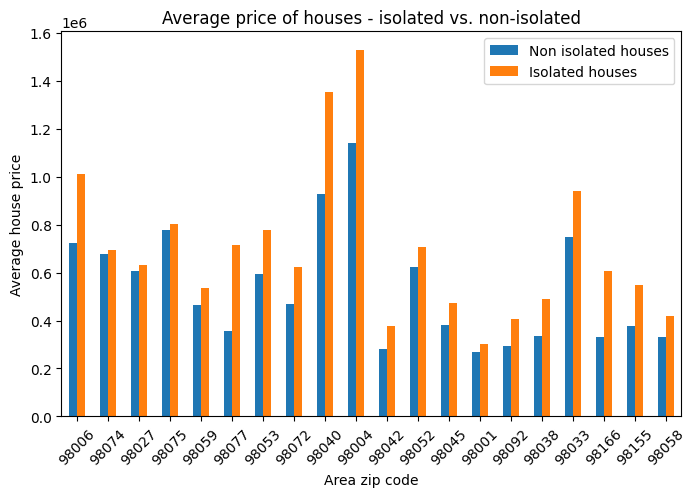

In [61]:
df_work_isolated_sales = df_work_isolated[df_work_isolated.zipcode.isin(tuple(df_work_isolated_groups[:20].index))]
grouped_isolated_df = df_work_isolated_sales.groupby(['zipcode','is_isolated']).mean()['price'].unstack().reindex(tuple(df_work_isolated_groups[:20].index))
ax4 = grouped_isolated_df.plot(kind='bar', title = 'Average price of houses - isolated vs. non-isolated', xlabel = 'Area zip code', ylabel = 'Average house price')
ax4.legend(['Non isolated houses','Isolated houses'])
ax4.tick_params(axis='x', labelrotation=45)

In [88]:
grouped_isolated_df

is_isolated,False,True
zipcode,,
98006,721868.324,1013219.911
98074,678475.150,694759.795
98027,605028.736,630832.875
98075,778360.257,802503.880
98059,466480.189,536281.929
98077,357264.706,713469.204
98053,595979.138,778873.363
98072,467518.242,624808.079
98040,926956.933,1353807.277


# 3rd hypothesis

Houses in central neighborhoods have fewer rooms (and are therefore less likely to accomodate families with many kids)"

In [77]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   house_id       21597 non-null  int64         
 3   id             21597 non-null  int64         
 4   bedrooms       21597 non-null  float64       
 5   bathrooms      21597 non-null  float64       
 6   sqft_living    21597 non-null  float64       
 7   sqft_lot       21597 non-null  float64       
 8   floors         21597 non-null  float64       
 9   waterfront     19206 non-null  float64       
 10  view           21534 non-null  float64       
 11  condition      21597 non-null  int64         
 12  grade          21597 non-null  int64         
 13  sqft_above     21597 non-null  float64       
 14  sqft_basement  21145 non-null  float64       
 15  yr_built       2159

<Axes: xlabel='bedrooms', ylabel='Count'>

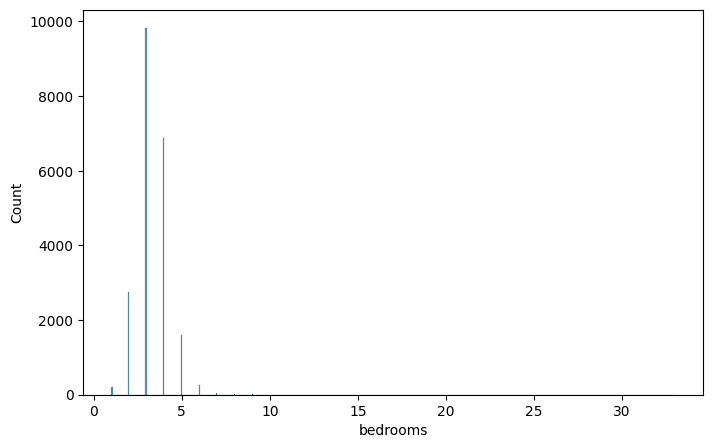

In [78]:
import seaborn as sns

sns.histplot(data = df_work['bedrooms'])

In [84]:
df_work['bedrooms'].plot(kind = 'box',  showfliers=True, xlabel = '', ylabel = 'Number of bedrooms in house', title = 'Number of bedrooms in King County - excluding outliers')
ax7.set_xticks([])

KeyError: 'bedrooms'

In [81]:
df_work['bedrooms'].describe()

count   21597.000
mean        3.373
std         0.926
min         1.000
25%         3.000
50%         3.000
75%         4.000
max        33.000
Name: bedrooms, dtype: float64

<Axes: xlabel='None,zipcode'>

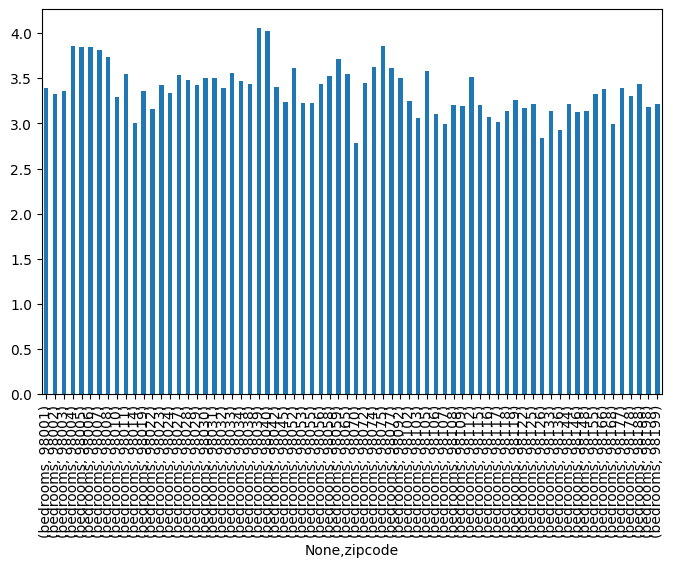

In [69]:
# The number of bedrooms is between 1 and 33. Assumption is that families with kids require at least 2 bedrooms. We will therefore check the average number of bedrooms per zip code
df_work_bedrooms_plot = df_work[['zipcode','bedrooms']].groupby(['zipcode']).mean().unstack()
df_work_bedrooms_plot.plot(kind ='bar', x = df_work_bedrooms.index, y = 'bedrooms')

In [70]:
#df_work_bedrooms[df_work_bedrooms['bedrooms'] <= 3.0]
df_work_bedrooms_plot = df_work_bedrooms_plot.reset_index(drop = False).drop('level_0', axis = 1).rename(columns = {0:'bedroom_average'})

<Axes: xlabel='zipcode'>

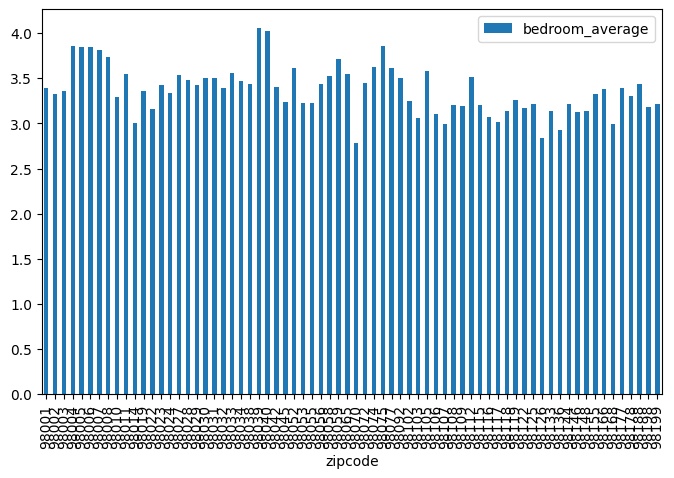

In [71]:
df_work_bedrooms_plot.plot(kind ='bar', x = 'zipcode', y = 'bedroom_average')

<Axes: title={'center': 'Average number of bedrooms per house sold per area in King County - Top 20'}, xlabel='Area zip code', ylabel='Average number of bedrooms'>

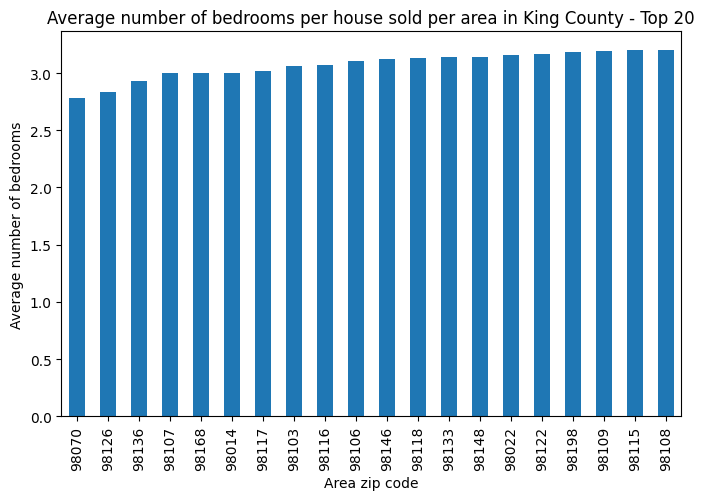

In [83]:
df_work = df_work_bedrooms.sort_values('bedroom_average', ascending = True,  )
df_work[0:20].plot(kind = 'bar', x= 'zipcode', y = 'bedroom_average',title = 'Average number of bedrooms per house sold per area in King County - Top 20', xlabel = 'Area zip code', ylabel = 'Average number of bedrooms', legend = [])

In [ ]:
# Location does not play a big role for the number of bedrooms. With the exceptions of a few zip codes, the average number of between 3 and 4, enough to accoommodate a few kids

# Conclusions:
Presentation available here : https://prezi.com/p/edit/otnjystmrle7/#ai-flow/details 